In [1]:
import dkist
import astropy
import numpy as np
import matplotlib.pyplot as plt
import sunpy
import sunpy.map
from ndcube import NDCube
from sun_blinker import SunBlinker
import astropy.units as u
from sunkit_image import coalignment

In [2]:
vbi_gband_dir = '../../src/DKIST/vbi_1024/AEZDV/'
vbi_gband_dataset = dkist.load_dataset(vbi_gband_dir)

In [3]:
vbi_gband_dataset.meta['headers'][137]['DATE-AVG']

'2022-10-24T19:20:02.820349'

<WCSAxes: >

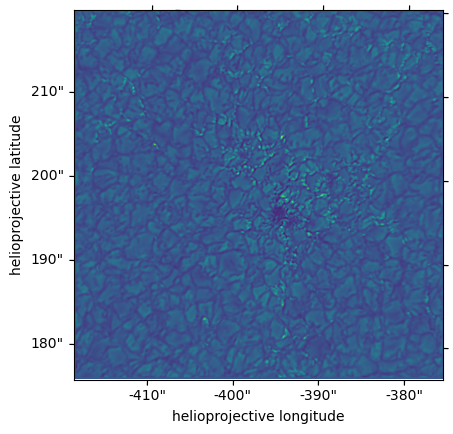

In [4]:
vbi_gband_dataset[137].plot()

In [5]:
vbi_gband_map = sunpy.map.Map('../../src/DKIST/vbi_1024/AEZDV/VBI_2022_10_24T19_20_02_820_00430500_I_AEZDV_L1.fits')
vbi_gband_map.meta['rsun_ref'] = 696000000.0

For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


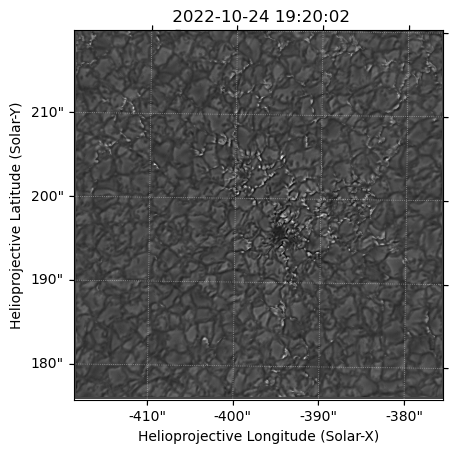

In [6]:
vbi_gband_map.plot()

In [7]:
hmi_ic_map = sunpy.map.Map('../../src/HMI/20221024/lvl15/hmi.Ic_45s.20221024_192100_TAI.2.continuum.fits')

In [8]:
hmi_ic_map_repro = hmi_ic_map.reproject_to(vbi_gband_map.wcs)

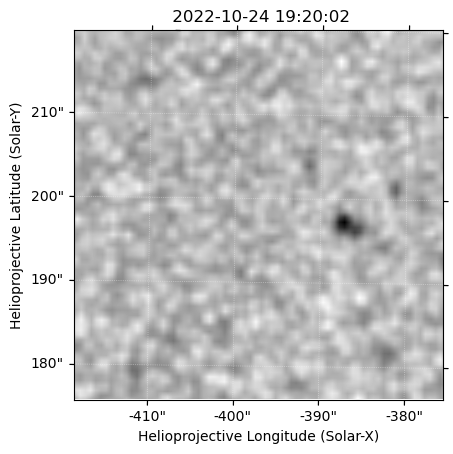

In [9]:
hmi_ic_map_repro.plot()

In [10]:
hmi_ic_cube = NDCube(hmi_ic_map.data, wcs=hmi_ic_map.wcs)
hmi_ic_cube_repro = hmi_ic_cube.reproject_to(vbi_gband_dataset[137].wcs)

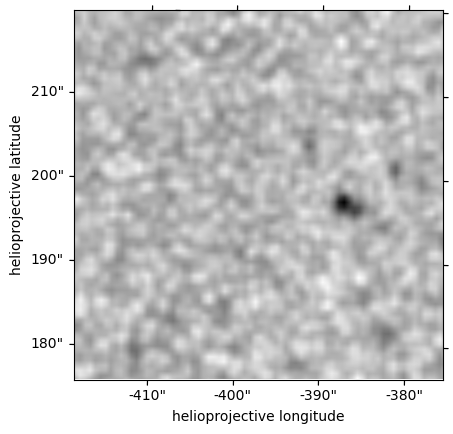

In [11]:
hmi_ic_cube_repro.plot(cmap='gray')
plt.grid('on',alpha=0.8)

In [12]:
vbi_gband_map_crop = vbi_gband_map.submap([1500,1024]*u.pix, 
                                          top_right=[3548,3072]*u.pix)

In [13]:
def coalign_shift(big_map, small_map):
    yshift, xshift = coalignment._calculate_shift(big_map.data, small_map.data)
    reference_coord = big_map.pixel_to_world(xshift, yshift)
    Txshift = reference_coord.Tx - small_map.bottom_left_coord.Tx
    Tyshift = reference_coord.Ty - small_map.bottom_left_coord.Ty

    return Txshift, Tyshift
    

In [14]:
vbi_hmi_xshift, vbi_hmi_yshift = coalign_shift(hmi_ic_map_repro, vbi_gband_map_crop)

For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


In [15]:
vbi_hmi_xshift, vbi_hmi_yshift

(<Angle -12.18182287 arcsec>, <Angle -4.16110362 arcsec>)

In [16]:
vbi_hbeta_map = sunpy.map.Map('../../src/DKIST/vbi_1024/BJOLO/VBI_2022_10_24T19_20_05_866_00486136_I_BJOLO_L1.fits')
vbi_hbeta_map.meta['rsun_ref'] = 696000000.0

For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


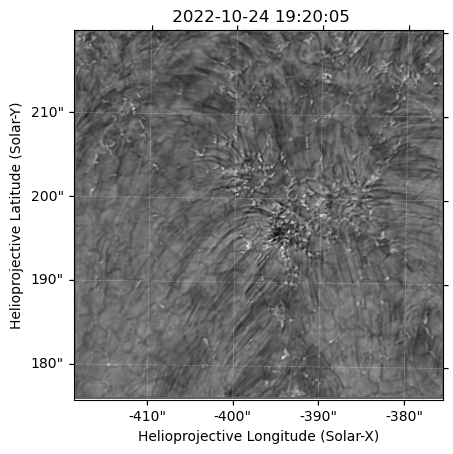

In [17]:
vbi_hbeta_map.plot()

In [18]:
SunBlinker(vbi_hbeta_map, vbi_gband_map, reproject=False)